# Problem 213: Flea Circus

A $30 \times 30$ grid of squares contains $900$ fleas, initially one flea per square.\
When a bell is rung, each flea jumps to an adjacent square at random (usually $4$ possibilities, except for fleas on the edge of the grid or at the corners).

What is the expected number of unoccupied squares after $50$ rings of the bell? Give your answer rounded to six decimal places.

In [77]:
from typing import List
import numpy as np

n = 30


def neighbours(index: int, n: int) -> List[int]:
    up = index - n if index - n >= 0 else None
    down = index + n if index + n < n**2 else None
    left = index - 1 if index % n != 0 else None
    right = index + 1 if index % n != (n - 1) else None

    return [_ for _ in [up, left, down, right] if _ is not None]


# calculate transition matrix, P
P = np.zeros((n**2, n**2), dtype=np.float64)
for i in range(n**2):
    _neighbours = neighbours(i, n)
    _p = 1 / len(_neighbours)
    for j in _neighbours:
        P[i, j] = _p

# Transition matrix after 50 rounds
P_50 = np.linalg.matrix_power(P, 50)

# Probability of each square being empty
prob_empty_square = (1 - np.linalg.matrix_power(P, 50)).prod(axis=0)

# expected number of empty squres
print("Result: ", round(prob_empty_square.sum(), 6))

Result:  330.721154


(-0.5, 29.5, 29.5, -0.5)

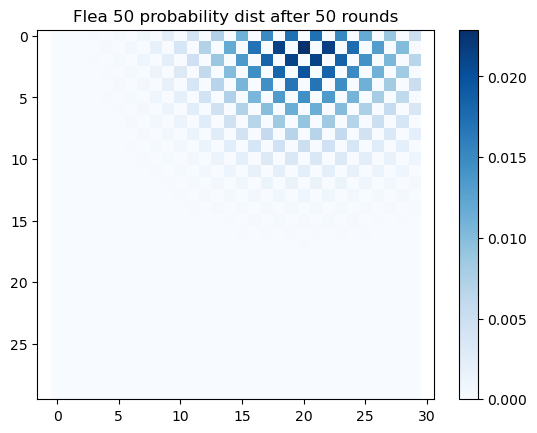

In [78]:
import matplotlib.pyplot as plt

plt.imshow(P_50[50, :].reshape((n, n)), cmap="Blues")
plt.title("Flea 50 probability dist after 50 rounds")
plt.colorbar()
plt.axis("equal")

(-0.5, 29.5, 29.5, -0.5)

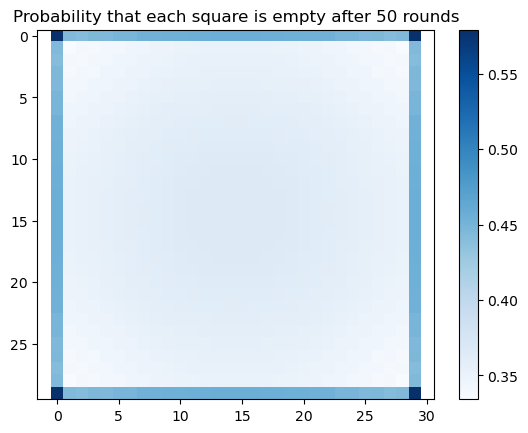

In [79]:
plt.imshow(prob_empty_square.reshape((n, n)), cmap="Blues")
plt.title("Probability that each square is empty after 50 rounds")
plt.colorbar()
plt.axis("equal")